In [1]:
import pandas as pd
import numpy as np

In [2]:
#import os

In [3]:
#os.getcwd()

In [4]:
#directory = '.\Sales_Data'

In [5]:
#os.listdir(directory)

In [6]:
#df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

In [7]:
#df.head()

In [9]:
#for filename in os.listdir(directory):
#    if filename.endswith("April_2019.csv"):
#        pass
#    else:
#        temp = pd.read_csv(directory+"/"+filename)
#        df = pd.concat([df,temp],ignore_index = True)

In [10]:
#df.head()

In [11]:
#df.shape

In [12]:
#df.info()

In [13]:
#df.to_csv("data.csv",index = False)

In [101]:
data = pd.read_csv("./data.csv")

In [102]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [103]:
data.shape

(186850, 6)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [105]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [106]:
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

In [107]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [108]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [109]:
data.iloc[517]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 517, dtype: object

In [110]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [111]:
data = data.loc[data['Order ID'] != 'Order ID']

In [112]:
data.shape

(185950, 6)

In [113]:
data[['Quantity Ordered','Price Each']] = data[['Quantity Ordered','Price Each']].apply(pd.to_numeric)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [114]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [115]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [116]:
from datetime import datetime

In [117]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [32]:
sales_by_month = data.groupby(data['Order Date'].dt.month).sum()['Sales']

In [33]:
month = range(1,13)

In [34]:
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

Text(0.5, 0, 'Months')

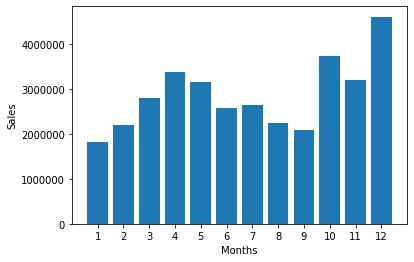

In [37]:
plt.bar(month, sales_by_month)
plt.xticks(month)
plt.ylabel('Sales')
plt.xlabel('Months')

In [38]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [39]:
address = data['Purchase Address'].str.split(',', expand = True)

In [40]:
address

,0,1,2
0,917 1st St,Dallas,TX 75001
1,682 Chestnut St,Boston,MA 02215
2,669 Spruce St,Los Angeles,CA 90001
3,669 Spruce St,Los Angeles,CA 90001
4,333 8th St,Los Angeles,CA 90001
...,...,...,...
186300,840 Highland St,Los Angeles,CA 90001
186301,216 Dogwood St,San Francisco,CA 94016
186302,220 12th St,San Francisco,CA 94016
186303,511 Forest St,San Francisco,CA 94016


In [118]:
data['Purchase Address'] = address[0]

In [119]:
data['Purchase City'] = address[1]

In [120]:
data['State/Pincode'] = address[2]

In [121]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Purchase City,State/Pincode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,23.90,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,99.99,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,600.00,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,11.99,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,11.99,Los Angeles,CA 90001


In [47]:
sales_by_city = data.groupby('Purchase City').sum()['Sales']

In [48]:
sales_by_city

Purchase City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

In [192]:
city = sales_by_city.index

In [193]:
city

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='Purchase City')

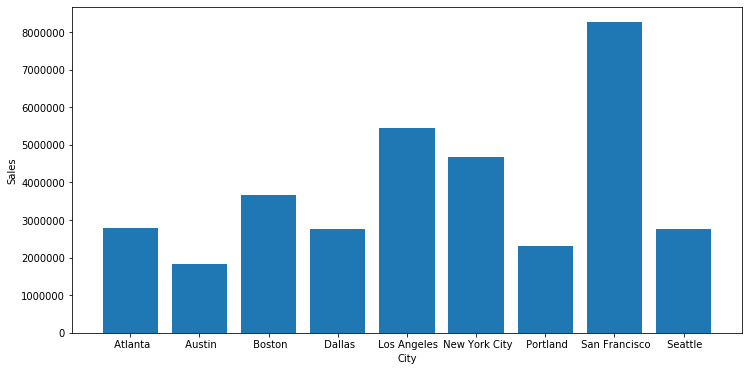

In [194]:
plt.figure(figsize = (12,6))
plt.bar(city, sales_by_city)
plt.xticks(city)
plt.ylabel('Sales')
plt.xlabel('City')
plt.show()

In [195]:
data['Hour'] = data['Order Date'].dt.hour

In [196]:
hours = [hour for hour, df in data.groupby('Hour')]

In [197]:
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

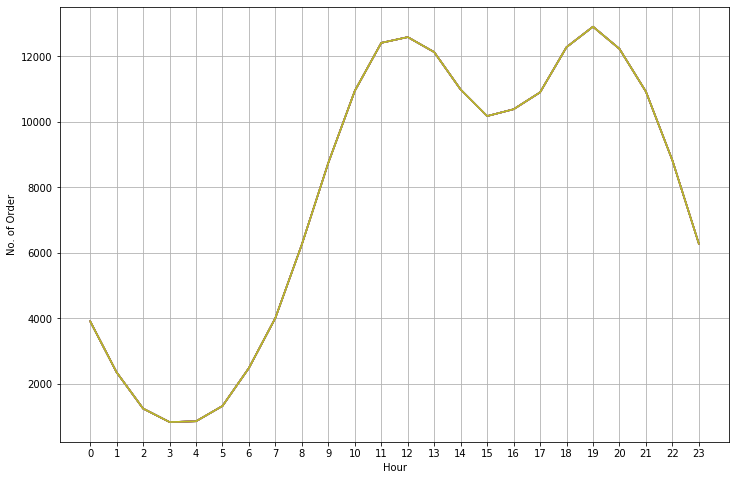

In [198]:
plt.figure(figsize = (12,8))
plt.plot(hours, data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('No. of Order')
plt.show()

In [199]:
data.drop('Hour', axis=1,inplace=True)

In [161]:
dup_data=data[data['Order ID'].duplicated(keep=False)][['Order ID', 'Product']]

In [162]:
dup_data

,Order ID,Product
2,176560,Google Phone
3,176560,Wired Headphones
17,176574,Google Phone
18,176574,USB-C Charging Cable
29,176585,Bose SoundSport Headphones
...,...,...
186248,259303,AA Batteries (4-pack)
186259,259314,Wired Headphones
186260,259314,AAA Batteries (4-pack)
186296,259350,Google Phone


In [163]:
dup_data['group'] = dup_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [164]:
dup_data.drop('Product', axis=1,inplace=True)

In [165]:
dup_data.drop_duplicates(inplace = True)

In [166]:
dup_data

,Order ID,group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [168]:
from itertools import combinations
from collections import Counter

In [169]:
count = Counter()

In [173]:
l = list(dup_data['group'].str.split(','))

In [175]:
for sublist in l:
    count.update(Counter(combinations(sublist,2)))

In [181]:
for key, value in count.most_common(1):
    print(key)

('iPhone', 'Lightning Charging Cable')


In [182]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Purchase City,State/Pincode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,23.90,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,99.99,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,600.00,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,11.99,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,11.99,Los Angeles,CA 90001


In [186]:
pdt_quantity = data.groupby('Product').sum()['Quantity Ordered']

In [200]:
product = pdt_quantity.index

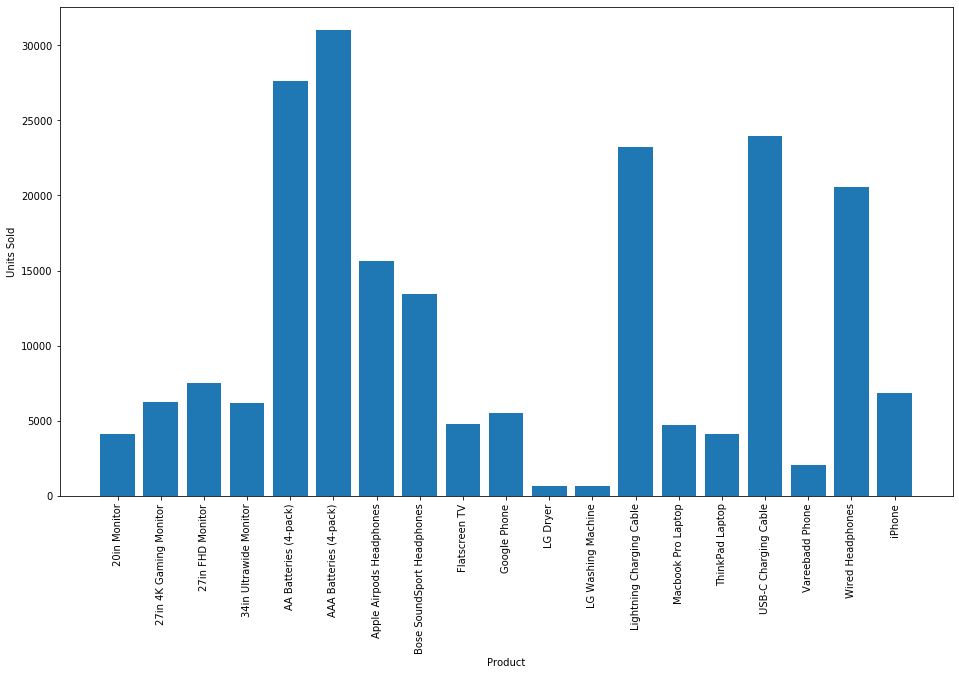

In [201]:
plt.figure(figsize=(16,9))
plt.bar(product, pdt_quantity)
plt.xticks(product, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.show()

In [203]:
avg_price = data.groupby('Product').mean()['Price Each']

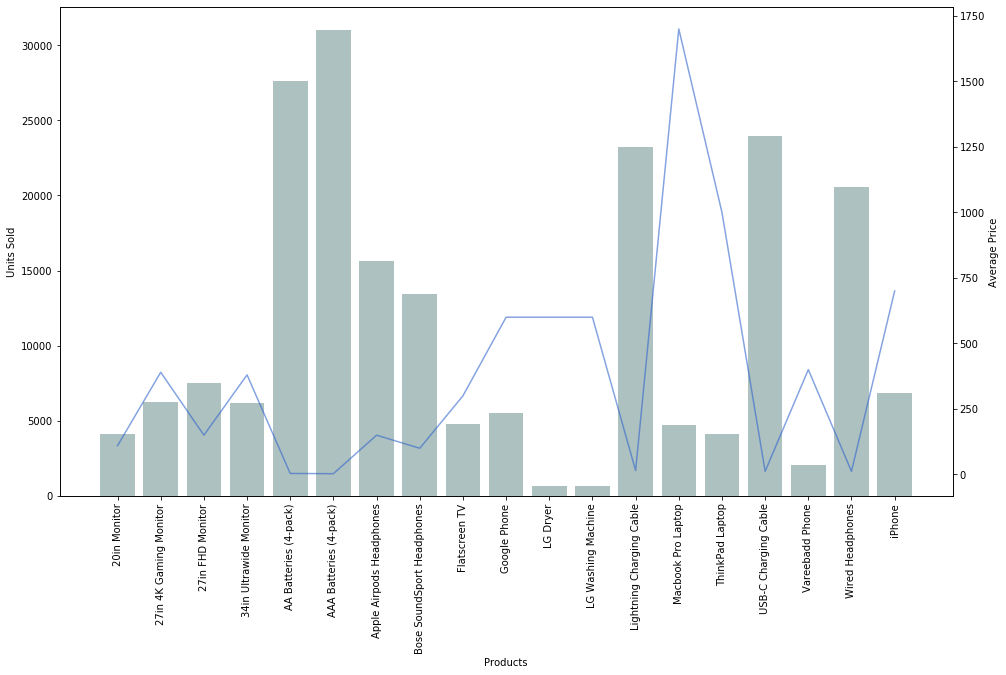

In [214]:
fig, ax1 = plt.subplots(figsize = (16,9))
ax2 = ax1.twinx()
ax1.bar(product, pdt_quantity, color=(.2,.4,.4,.4))
ax2.plot(product,avg_price,color=(.2,.4,.8,.6))
ax1.set_xticklabels(product,rotation='vertical')
ax1.set_ylabel('Units Sold')
ax2.set_ylabel('Average Price')
ax1.set_xlabel('Products')
plt.show()